In [41]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False


In [22]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

In [23]:
train_input

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [24]:
#표준화작업
train_scaled= train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28)   #flatten층에서 사이즈 그대로 적용(28,28)

In [25]:
train_scaled,val_scaled,train_target,val_target=train_test_split(
train_scaled,train_target,test_size=0.2, random_state=42)

In [26]:
train_scaled.shape

(48000, 28, 28)

In [27]:
train_scaled.shape

(48000, 28, 28)

In [28]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))   #sigmoid
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.8907 - loss: 0.3055
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.8972 - loss: 0.2863
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.9007 - loss: 0.2773
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.8999 - loss: 0.2831
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.9036 - loss: 0.2672
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9073 - loss: 0.2657
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.9089 - loss: 0.2597
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.9110 - loss: 0.2535
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.9166 - loss: 0.2420
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.9158 - loss: 0.2431
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.9182 - loss: 0.2369
Epoch 12

In [33]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.8909 - loss: 0.4229


[0.43544718623161316, 0.8918333053588867]

In [ ]:
epochs = 20 훈련세트 정확도가 높아짐
검증세트를 가지고 정확도를 측정

In [48]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#epochs 돌때마다 loss,accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.9377 - loss: 0.1875
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.9385 - loss: 0.1829
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.9409 - loss: 0.1800
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.9403 - loss: 0.1784
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.9419 - loss: 0.1707
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.9432 - loss: 0.1674
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 957us/step - accuracy: 0.9438 - loss: 0.1654
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9448 - loss: 0.1665
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.9454 - loss: 0.1668
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9452 - loss: 0.1656
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.9490 - loss: 0.1603
Epoch 12

In [ ]:
#테스트 세트도 함께 검증;history
model.fit - loss, accuracy

In [35]:
#history keys index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [50]:
history.history['loss']
history.history['accuracy']

[0.9367708563804626,
 0.9383958578109741,
 0.9396041631698608,
 0.9402708411216736,
 0.9396874904632568,
 0.9418125152587891,
 0.9424791932106018,
 0.9432916641235352,
 0.9431041479110718,
 0.9448333382606506,
 0.9457708597183228,
 0.9467916488647461,
 0.9474583268165588,
 0.9490208625793457,
 0.9485833048820496,
 0.9490625262260437,
 0.9491041898727417,
 0.9515208601951599,
 0.9507291913032532,
 0.9521041512489319]

In [ ]:
#train세트 검증데이터(loss,accuracy) 그래프

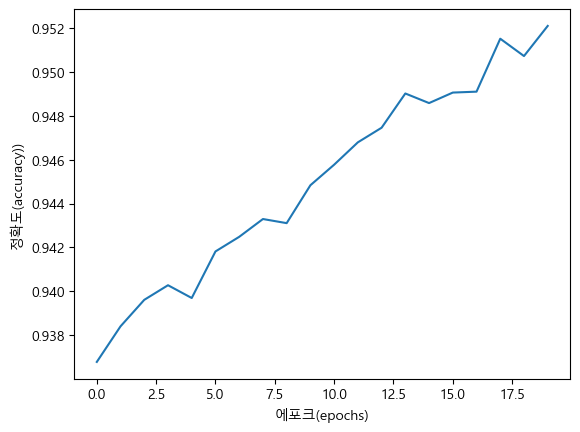

In [53]:
# 정확도 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy))')
# plt.savefig('m0529_03',dpi=300)
plt.show()

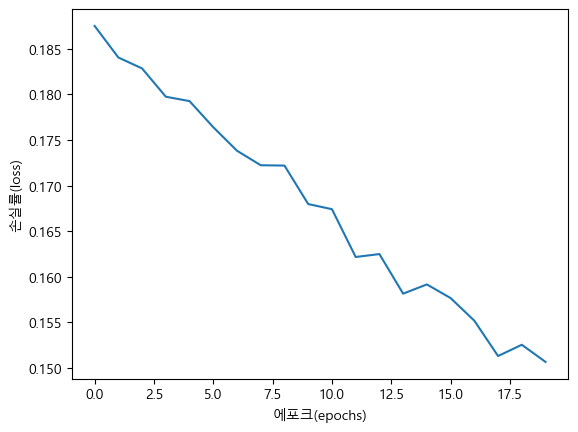

In [54]:

plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03',dpi=300)
plt.show()

In [ ]:
#model.fit-loss, accuracy 정보를 리턴(history)
#테스트 세트도 함께 검증. history 정보로 받을수 있음.

In [57]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#epochs 돌때마다 loss,accuracy 값을 저장
#train_scaled,val_scaled 함께 훈련시킴.
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target))


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9619 - loss: 0.1246 - val_accuracy: 0.8809 - val_loss: 0.8443
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9640 - loss: 0.1131 - val_accuracy: 0.8752 - val_loss: 0.8493
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9653 - loss: 0.1185 - val_accuracy: 0.8749 - val_loss: 0.8894
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9647 - loss: 0.1166 - val_accuracy: 0.8819 - val_loss: 0.8516
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9649 - loss: 0.1128 - val_accuracy: 0.8813 - val_loss: 0.8185
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9636 - loss: 0.1166 - val_accuracy: 0.8791 - val_loss: 0.8842
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9666 - loss: 0.1117 - val_accuracy: 0.8785 - val_loss: 0.8440
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9638 - loss: 0.1148 - 

In [ ]:
# 총 4개 속성-train 셋트(accuracy) test세트(loss)

In [ ]:
plt.plot(history.history)

NameError: name 'show' is not defined

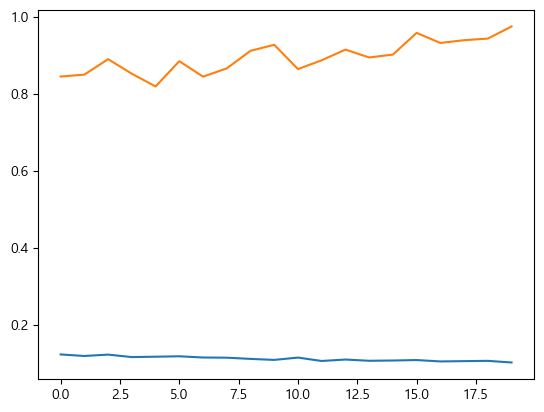

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt(show)

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(loss)')
plt.ylabel('손실률(val_loss)')
# plt.savefig('m0529_03',dpi=300)
plt.show()

# 변경
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델구성 model.summary()
# 모델설정 옵티마이저optimizer=adam 

# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)